#Format Data for Experiment in ABM environment

In [1]:
#Import Packages
#Needed for moving to output
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as pl

#Analysis tumor-tcell modules needed
from tumor_tcell.library.population_plots import death_group_plot
from tumor_tcell.library.population_plots import population_group_plot

In [2]:
#Get csv saved in experiment id library
analysis_dir = '/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/'
save_dir = analysis_dir+'Multiple_analysis/'


#Make a new folder to call analysis
analysis_out_dir = save_dir + 'PD1_80_inout' #####################
os.makedirs(analysis_out_dir, exist_ok=True)

In [3]:
#Choose the experiment list for comparison
experiment_list = [ 'tumor_tcell_20210501.171624/', 
                   'tumor_tcell_20210503.163607/', ] #####################3

# experiment_list = ['tumor_tcell_20210429.132351/', 'tumor_tcell_20210430.175059/', 
#                    'tumor_tcell_20210501.171624/', 'tumor_tcell_20210503.163607/']

#Rename for how you want it to display on the graph
experiment_rename = { 
                     'tumor_tcell_20210501.171624/':'80% PD1+ inside', 
                     'tumor_tcell_20210503.163607/':'80% PD1+ outside' 
                    } ######################

# experiment_rename = {'tumor_tcell_20210429.132351/':'20% PD1+ outside', 
#                      'tumor_tcell_20210430.175059/':'20% PD1+ inside', 
#                    'tumor_tcell_20210501.171624/':'80% PD1+ inside', 
#                      'tumor_tcell_20210503.163607/':'80% PD1+ outside'}

#Create a list of dataframes for concatenation
df_tumor_death_list = []
df_tcell_death_list = []
tumor_plot_list = []
tcell_plot_list = []

#read in dataframes
for experiment in experiment_list:
   
    experiment_id = experiment
    experiment_dir = analysis_dir+experiment_id
    os.chdir(experiment_dir)

    df_tumor_death = pd.read_csv('tumor_death.csv')
    df_tumor_death['experiment_name'] = df_tumor_death['experiment_id'].map(experiment_rename)
    df_tumor_death_list.append(df_tumor_death)
    
    df_tcell_death = pd.read_csv('tcell_death.csv')
    df_tcell_death['experiment_name'] = df_tcell_death['experiment_id'].map(experiment_rename)
    df_tcell_death_list.append(df_tcell_death)
    
    tumor_plot = pd.read_csv('tumor_plot.csv')
    tumor_plot['experiment_name'] = tumor_plot['experiment_id'].map(experiment_rename)
    tumor_plot_list.append(tumor_plot)
    
    tcell_plot = pd.read_csv('tcell_plot.csv')
    tcell_plot['experiment_name'] = tcell_plot['experiment_id'].map(experiment_rename)
    tcell_plot_list.append(tcell_plot)
    
tcell_plot_list[0];

## Grouped Analysis Graphs

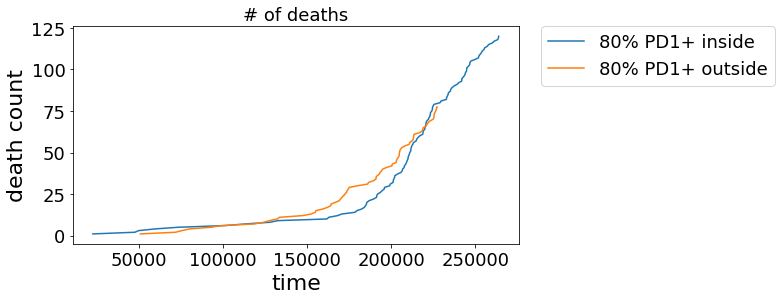

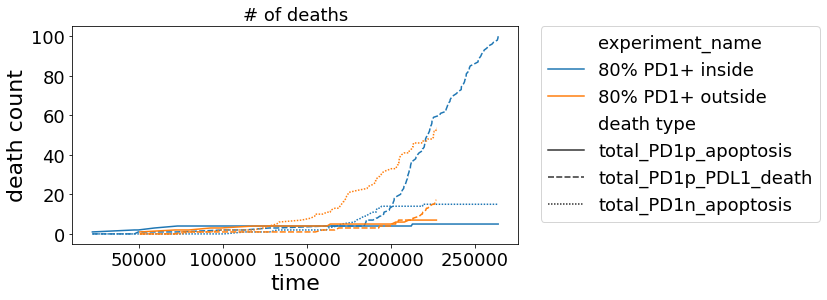

In [4]:
death_group_plot(death_plot_list = df_tcell_death_list, out_dir=analysis_out_dir, save_name='Tcells')

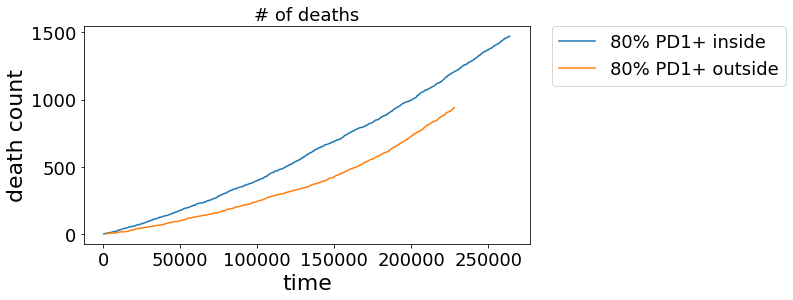

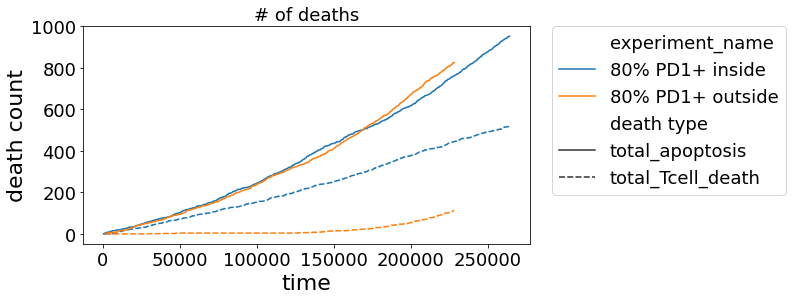

In [5]:
death_group_plot(death_plot_list = df_tumor_death_list, out_dir=analysis_out_dir, save_name='Tumors')

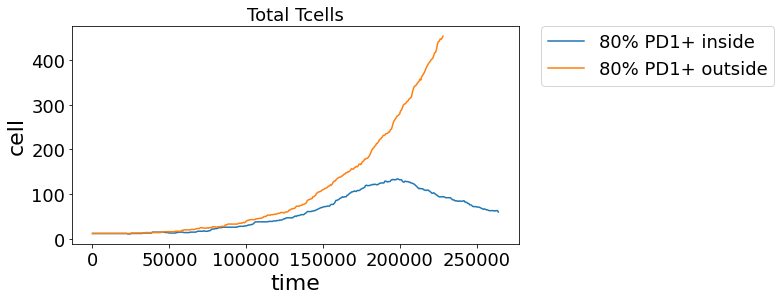

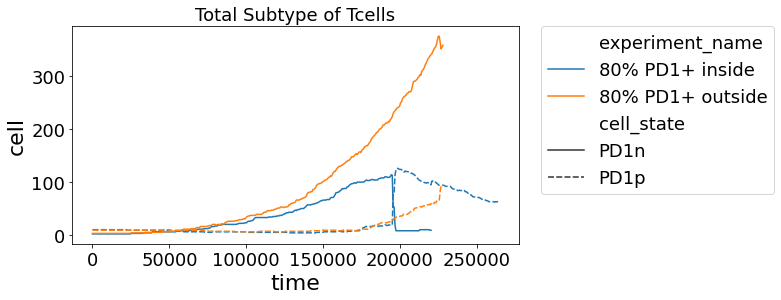

In [6]:
population_group_plot(cell_plot_list = tcell_plot_list, cell_states = ['PD1n','PD1p'], out_dir=analysis_out_dir, save_name='Tcells')

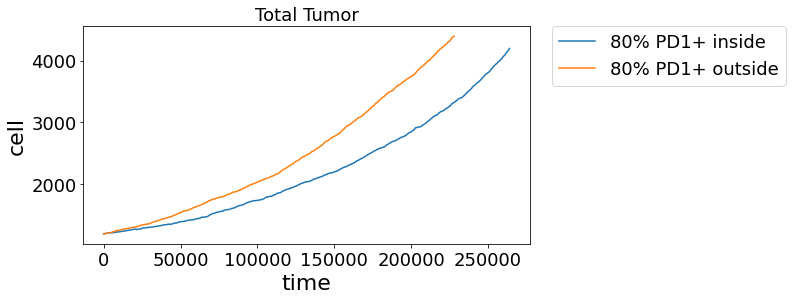

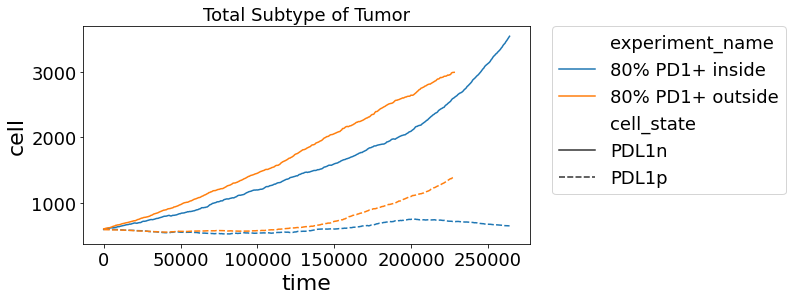

In [7]:
population_group_plot(cell_plot_list = tumor_plot_list, cell_states = ['PDL1n','PDL1p'], out_dir=analysis_out_dir, save_name='Tumor')